In [1]:
import numpy as np
from mpmath import findroot
import matplotlib.pyplot as plt

In [2]:
# inverts the order of elements in these arrays
def inv(w, n, k):
    wc = np.array(w)
    nc = np.array(n)
    kc = np.array(k)
    for i in range(len(w)):
        w[i] = wc[len(w)-1-i]
        n[i] = nc[len(w)-1-i]
        k[i] = kc[len(w)-1-i]
    return w, n, k

## Bruggeman rule

In [3]:
# implements mixing of materials using Bruggeman rule
def mix(data, stp=complex(0.5,0.5), abund=1, adapt_stp=True):
    eps_all = np.array([ [complex(n, k)**2 for n, k in zip(dt[:,1], dt[:,2])] for dt in data ])
    
    if abund == 1:
        abund = [1/len(eps_all[:,0]) for i in range(len(eps_all[:,0]))]
    
    n = []
    k = []
    for i in range(len(eps_all[0])):
        eps = eps_all[:,i]
        
        def eqn(x):
            s = complex(0)
            for e, a in zip(eps, abund):
                s += a * (e - x) / (e + 2 * x)
            return s

        eps_mean = complex(findroot(eqn, stp))
        if adapt_stp:
            stp = eps_mean
        
        a = eps_mean.real
        b = eps_mean.imag
        kcsq = 0.5*(-a+np.sqrt(a**2+b**2))
        kc = np.sqrt(kcsq)
        nc = b/(2*kc)
        n.append(nc)
        k.append(kc)

    return n, k

## Plotter

In [4]:
# produces plots of optical constants provided on input
def plot(w, n, k):
    plt.plot(w, n)
    plt.ylim(0, 5.2)
    plt.ylabel(r'$n(\lambda)$')
    plt.xscale('log')
    plt.xlim(0.01, 100)
    plt.xlabel(r'wavelength $\lambda$ [$\mu$m]')
    plt.show()
    
    plt.plot(w, k)
    plt.yscale('log')
    plt.ylim(2e-6, 5e1)
    plt.ylabel(r'$k(\lambda)$')
    plt.xscale('log')
    plt.xlim(0.01, 100)
    plt.xlabel(r'wavelength $\lambda$ [$\mu$m]')
    plt.show()

## iron_O88

Data digitized from the publication.

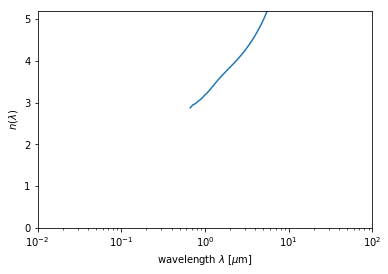

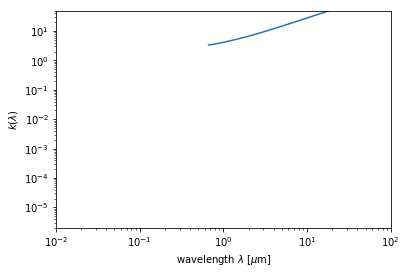

52


In [5]:
direct = 'iron_O88'

data = np.loadtxt(direct+'/O88_Table_2.dat')
w = [1/k*1e4 for k in data[:,0]]
n = data[:,1]
k = data[:,2]

w, n, k = inv(w, n, k)

plot(w, n, k)
    
output = np.transpose(np.array([w,n,k]))
np.savetxt(direct+'/opt_const.dat', output)
print(len(w))

## fayalite_F01

Data downloaded from JENA database.

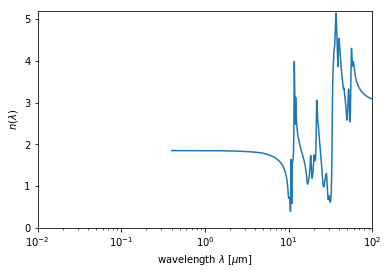

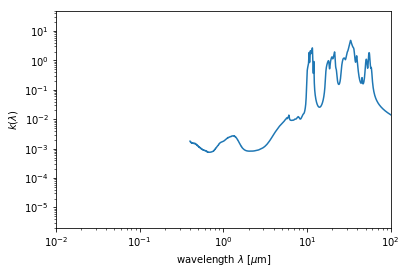

2998


In [6]:
direct = 'fayalite_F01'

files = ['fay_nk_x.txt', 'fay_nk_y.txt', 'fay_nk_z.txt']
data = []
for file in files:
    data.append(np.loadtxt(direct+'/'+file, skiprows=7))
data = np.array(data)

w = [1/k*1e4 for k in data[0,:,0]]
n, k = mix(data)

w, n, k = inv(w, n, k)

data = np.loadtxt(direct+'/fay_vis.txt', skiprows=6)
ws = [1/k*1e4 for k in data[:,0]]
ns = data[:,1]
ks = data[:,2]
ws, ns, ks = inv(ws, ns, ks)

w = np.concatenate((ws, w[4001:]))
n = np.concatenate((ns, n[4001:]))
k = np.concatenate((ks, k[4001:]))

plot(w, n, k)
    
output = np.transpose(np.array([w,n,k]))
np.savetxt(direct+'/opt_const.dat', output)
print(len(w))

## enstatite_J98_J94_D95

Data downloaded from JENA database.

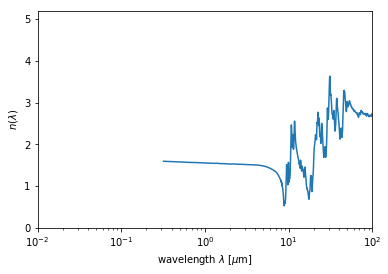

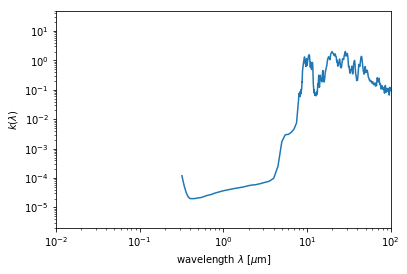

825


In [7]:
direct = 'enstatite_J98_J94_D95'

files = ['ens_p.txt', 'ens_s1.txt', 'ens_s2.txt']
data = []
for file in files:
    data.append(np.loadtxt(direct+'/'+file))
data = np.array(data)

w = data[0,:,0]
n, k = mix(data)

data = np.loadtxt(direct+'/pyrmg100.txt')
ws = data[:,0]
ns = data[:,1]
ks = data[:,2]

w = np.concatenate((ws[6:46], w[23:]))
n = np.concatenate((ns[6:46], n[23:]))
k = np.concatenate((ks[6:46], k[23:]))

plot(w, n, k)

output = np.transpose(np.array([w,n,k]))
np.savetxt(direct+'/opt_const.dat', output)
print(len(w))

## olivine_F01

Data downloaded from JENA database.

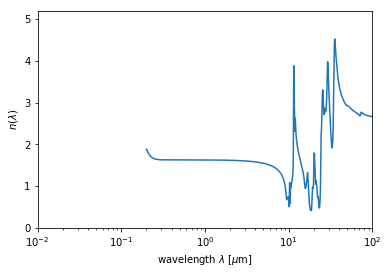

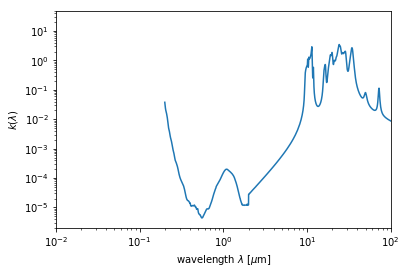

5080


In [8]:
direct = 'olivine_F01'

files = ['oliv_nk_x.txt', 'oliv_nk_y.txt', 'oliv_nk_z.txt']
data = []
data.append(np.loadtxt(direct+'/'+files[0], skiprows=7))
data.append(np.loadtxt(direct+'/'+files[1], skiprows=6))
data.append(np.loadtxt(direct+'/'+files[2], skiprows=5))
data = np.array(data)

w = [1/k*1e4 for k in data[0,:,0]]
n, k = mix(data)
w, n, k = inv(w, n, k)

data = np.loadtxt(direct+'/oliv_vis.txt', skiprows=5)
ws = [1/k*1e4 for k in data[:,0]]
ns = data[:,1]
ks = data[:,2]
ws, ns, ks = inv(ws, ns, ks)

w = np.concatenate((ws, w))
n = np.concatenate((ns, n))
k = np.concatenate((ks, k))

plot(w, n, k)
    
output = np.transpose(np.array([w,n,k]))
np.savetxt(direct+'/opt_const.dat', output)
print(len(w))

## quartz_Z13

Data downloaded from JENA database.

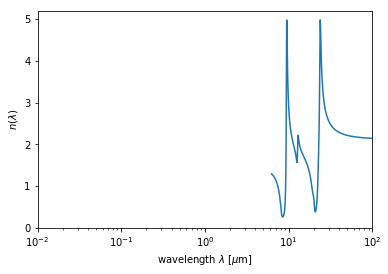

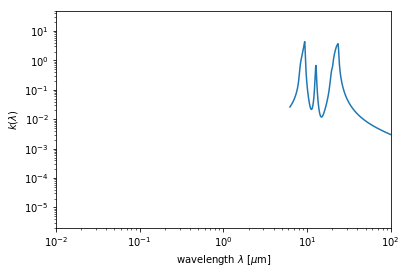

1600


In [9]:
direct = 'quartz_Z13'

temp = '928'
files = ['quartz_Epara_'+temp+'Knew.txt', 'quartz_Eperp_'+temp+'Knew.txt']
data = []
for file in files:
    data.append(np.loadtxt(direct+'/'+file))
data = np.array(data)

w = data[0,:,0]
#n, k = mix(data)
n, k = mix(data, abund=[0.33,0.67])
w, n, k = inv(w, n, k)

plot(w, n, k)

output = np.transpose(np.array([w,n,k]))
np.savetxt(direct+'/opt_const.dat', output)
print(len(w))

## corundum_K95

Data digitized from the publication.

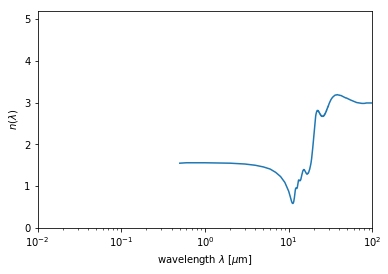

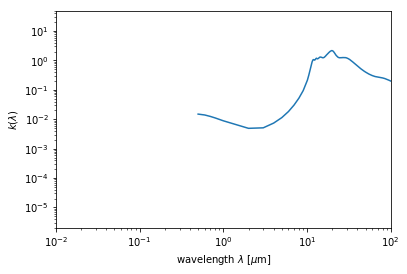

267


In [10]:
direct = 'corundum_K95'

data = np.loadtxt(direct+'/opt_const.dat')
w = data[:,0]
n = data[:,1]
k = data[:,2]

plot(w, n, k)
print(len(w))

## silicon_carbide_L93

Data from Draine's website.

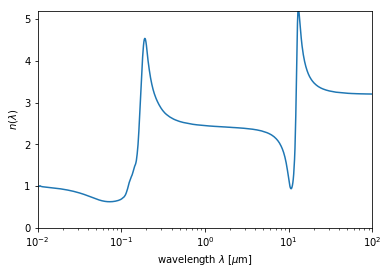

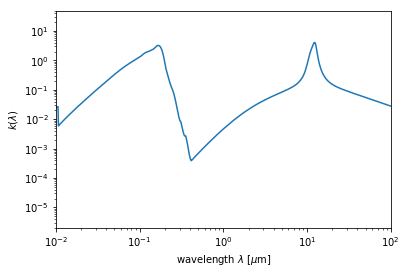

1201


In [11]:
direct = 'silicon_carbide_L93'

data = np.loadtxt(direct+'/eps_SiC', skiprows=6)
w = data[:,0]
n = [nc+1 for nc in data[:,3]]
k = data[:,4]

w, n, k = inv(w, n, k)

plot(w, n, k)

output = np.transpose(np.array([w,n,k]))
np.savetxt(direct+'/opt_const.dat', output)
print(len(w))

## graphite_D84

Data from Draine's website.

C:\Users\mj516\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: RuntimeWarning: divide by zero encountered in double_scalars


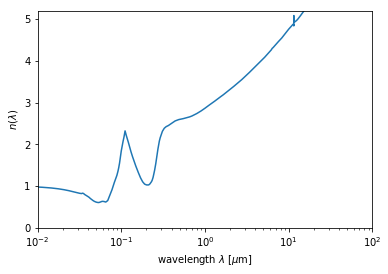

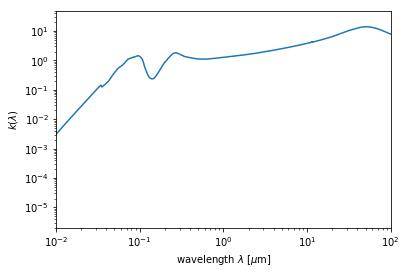

386


In [12]:
direct = 'graphite_D84'

files = ['callindex.out_CpaD03_0.10', 'callindex.out_CpeD03_0.10']
data1 = np.loadtxt(direct+'/'+files[0], skiprows=5, usecols=(0,3,4))
data2 = np.loadtxt(direct+'/'+files[1], skiprows=5, usecols=(0,3,4))

for i in range(len(data1[:,0])):
    data1[i,1] = data1[i,1]+1
for i in range(len(data2[:,0])):
    data2[i,1] = data2[i,1]+1

data2_new = np.array(data1)
j = 0
for i in range(len(data1[:,0])):
    while j < len(data2[:,0])-2 and data1[i,0] < data2[j,0]:
        j += 1
    
    data2_new[i,0] = data1[i,0]
    data2_new[i,1] = data2[j,1] + (data1[i,0]-data2[j,0])*(data2[j+1,1]-data2[j,1])/(data2[j+1,0]-data2[j,0])
    data2_new[i,2] = data2[j,2] + (data1[i,0]-data2[j,0])*(data2[j+1,2]-data2[j,2])/(data2[j+1,0]-data2[j,0])

#w1 = data2[:,0]
#n1 = data2[:,1]
#k1 = data2[:,2]
#w2 = data2_new[:,0]
#n2 = data2_new[:,1]
#k2 = data2_new[:,2]
#plot(w1, n1, k1)
#plot(w2, n2, k2)

data2 = np.array(data2_new)
data = np.array([data1, data2])

w = data[0,:,0]
n, k = mix(data, abund=[0.33,0.67], adapt_stp=False)
w, n, k = inv(w, n, k) 

plot(w, n, k)

output = np.transpose(np.array([w[7:],n[7:],k[7:]])) # exclude infs and zeros
np.savetxt(direct+'/opt_const.dat', output)
print(len(w))

## graphite_D84_test

C:\Users\mj516\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: RuntimeWarning: divide by zero encountered in double_scalars


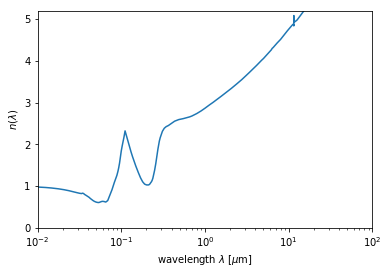

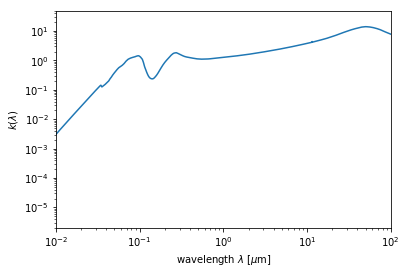

386


In [13]:
direct = 'graphite_D84_test'

files = ['callindex.out_CpaD03_0.10', 'callindex.out_CpeD03_0.10']
data1 = np.loadtxt(direct+'/'+files[0], skiprows=5, usecols=(0,3,4))
data2 = np.loadtxt(direct+'/'+files[1], skiprows=5, usecols=(0,3,4))

for i in range(len(data1[:,0])):
    data1[i,1] = data1[i,1]+1
for i in range(len(data2[:,0])):
    data2[i,1] = data2[i,1]+1

data2_new = np.array(data1)
j = 0
for i in range(len(data1[:,0])):
    while j < len(data2[:,0])-2 and data1[i,0] < data2[j,0]:
        j += 1
    
    data2_new[i,0] = data1[i,0]
    data2_new[i,1] = data2[j,1] + (data1[i,0]-data2[j,0])*(data2[j+1,1]-data2[j,1])/(data2[j+1,0]-data2[j,0])
    data2_new[i,2] = data2[j,2] + (data1[i,0]-data2[j,0])*(data2[j+1,2]-data2[j,2])/(data2[j+1,0]-data2[j,0])

#w1 = data2[:,0]
#n1 = data2[:,1]
#k1 = data2[:,2]
#w2 = data2_new[:,0]
#n2 = data2_new[:,1]
#k2 = data2_new[:,2]
#plot(w1, n1, k1)
#plot(w2, n2, k2)

data2 = np.array(data2_new)
data = np.array([data1, data2])

w = data[0,:,0]
n, k = mix(data, abund=[0.33,0.67], adapt_stp=False)
#w, n, k = inv(w, n, k) 

plot(w, n, k)

output = np.transpose(np.array([w[7:],n[7:],k[7:]])) # exclude infs and zeros
np.savetxt(direct+'/opt_const.dat', output)
print(len(w))